In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels import regression
from scipy import poly1d

           9           8         7        6         5         4
-0.001957 x + 0.08056 x - 1.395 x + 13.2 x - 74.03 x + 249.5 x
          3         2
 - 486.5 x + 492.8 x - 191.4 x - 0.4601
[-12.80448661  -3.68712955   5.43022751  14.54758457  23.66494164
  32.7822987   41.89965576  51.01701282  60.13436988  69.25172695]


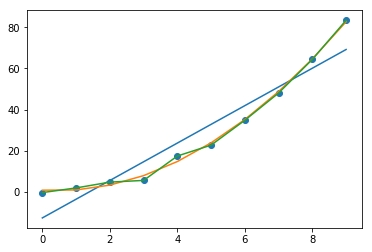

In [11]:
x = np.arange(10)
y = 2*np.random.randn(10) + x**2
xs = np.linspace(-0.25, 9.25, 200)

lin = np.polyfit(x,y,1)
quad = np.polyfit(x,y,2)
many = np.polyfit(x,y,9)

plt.scatter(x,y)
print(poly1d(many))
print(poly1d(lin)(x))
plt.plot(x, poly1d(lin)(x))
plt.plot(x, poly1d(quad)(x))
plt.plot(x, poly1d(many)(x))

In [12]:

!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


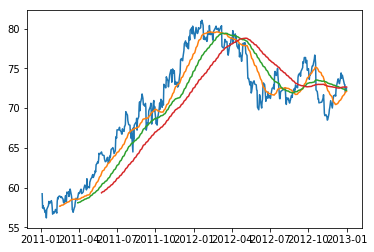

In [13]:
pricing = pdr.data.DataReader('MCD', data_source='yahoo', start=datetime(2011,1,1), end=datetime(2013,1,1)).iloc[:, -1]

mu_30 = pricing.rolling(30).mean()
mu_60 = pricing.rolling(60).mean()
mu_100 = pricing.rolling(100).mean()

plt.plot(pricing)
plt.plot(mu_30)
plt.plot(mu_60)
plt.plot(mu_100)

In [15]:
def trade(stock, length):
    if length==0:
        return 0
    
    rolling_window = stock.rolling(length)
    mu = rolling_window.mean()
    std = rolling_window.std()
    
    #number of std dev from the mean the data point is
    #contrarian strategy
    zscores = (stock - mu) / std
    
    money, count = 0,0
    
    for i in range(len(stock)):
        if zscores[i] > 1:
            money += stock[i]
            count -=1
        elif zscores[i] < -1:
            money -= stock[i]
            count +=1
        elif abs(zscores[i]) < 0.5:
            money += count * stock[i]
            count = 0
    return money

In [18]:
trade(pricing, 30)

107.68440628051758

[0, 0, 0, -6.821743011474609, 0.7911453247070312, 41.90555953979492, -254.31957244873047, -186.15995407104492, -188.8438720703125, -257.7132911682129, -41.66584014892578, 905.1530532836914, -225.0391731262207, -193.0697364807129, -130.5923309326172, -56.552459716796875, -44.3633918762207, -69.76684951782227, 3.0186729431152344, -30.61919403076172, -14.651996612548828, 23.144176483154297, 16.172279357910156, -7.45916748046875, -0.553466796875, 0.1722564697265625, 14.306900024414062, 54.365135192871094, 100.47760772705078, 119.72416305541992, 107.68440628051758, 114.94475936889648, 132.23452758789062, 124.57470703125, 123.00789642333984, 124.3656005859375, 125.1833724975586, 128.93692016601562, 131.74776458740234, 132.21166229248047, 154.97284698486328, 7.793647766113281, 4.936134338378906, -9.34051513671875, -30.628292083740234, -18.359867095947266, -32.27799606323242, -23.746768951416016, -25.47226333618164, 24.807899475097656, -150.10948944091797, -158.67687606811523, -146.21253967285

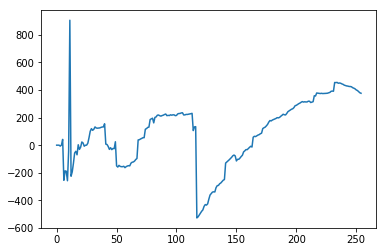

In [19]:
length_zscores = [trade(pricing, l) for l in range(255)]
print(length_zscores)
best_length = np.argmax(length_zscores)
print(best_length)

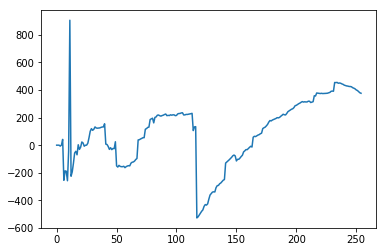

In [20]:

plt.plot(length_zscores)